In [40]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir("/home/elise/projects/whole-genome-tiling-predictions/")

In [18]:
N2a_human_1M = pd.read_csv("scores/PB-PY-0011.hg38.scores.min.1Mrand.txt",
                          header=None, sep=' ')
N2a_mouse_1M = pd.read_csv("scores/PB-PY-0011.mm10.scores.min.1Mrand.txt",
                          header=None, sep=' ')

HepG2_human_1M = pd.read_csv("scores/PB-PY-0012.hg38.scores.min.1Mrand.txt",
                            header=None, sep=' ')
HepG2_mouse_1M = pd.read_csv("scores/PB-PY-0012.mm10.scores.min.1Mrand.txt",
                            header=None, sep=' ')

In [95]:
N2a_all_1M = ( N2a_human_1M
              .assign(model='N2a',spec='human')
                      .append( N2a_mouse_1M
                                .assign(model='N2a',spec='mouse') ) )

HepG2_all_1M = ( HepG2_human_1M
              .assign(model='HepG2',spec='human')
                      .append( HepG2_mouse_1M
                                .assign(model='HepG2',spec='mouse') ) )

both_long_1M = (N2a_all_1M
                .append(HepG2_all_1M)
                .rename(columns={0:'pred_act',1:'chr',2:'pos'}))

both_merged_1M = (N2a_all_1M
                  .rename(columns={0:'N2a'})
                  .filter(['N2a',1,2,'spec'])
                  .merge(HepG2_all_1M
                         .rename(columns={0:'HepG2'})
                         .filter(['HepG2',1,2,'spec']),
                                  on=(1,2,'spec')))

del N2a_all_1M
del HepG2_all_1M


In [53]:
print(both_long_1M.shape)

print(both_merged_1M.shape)
print(both_merged_1M.head)


(4000000, 5)
(46808, 5)
<bound method NDFrame.head of             N2a                    1          2   spec     HepG2
0      0.105368  chr6_GL000254v2_alt    2928950  human -0.145197
1     -0.259336                 chr1  145249450  human  0.037935
2      0.040615                chr10  118473300  human  0.199260
3     -0.264276                 chr5  115078200  human -0.419673
4     -1.048694                chr17   23355400  human -0.215711
...         ...                  ...        ...    ...       ...
46803  0.176253                 chr5  112381550  mouse  0.177382
46804 -0.995117                 chr3   15828250  mouse -0.477741
46805 -0.296676                 chr9   78815550  mouse -0.050809
46806  0.635145                chr13   51237650  mouse -0.196213
46807 -0.842026                 chrX   93936050  mouse -0.351654

[46808 rows x 5 columns]>


<AxesSubplot:xlabel='model', ylabel='pred_act'>

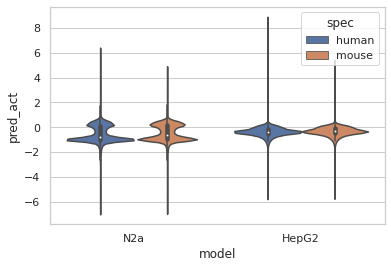

In [45]:
sns.set(style="whitegrid")
sns.violinplot(data=both_long_1M,
               x='model',
               y='pred_act',
              hue='spec')
#plt.axhline(0,color='black')


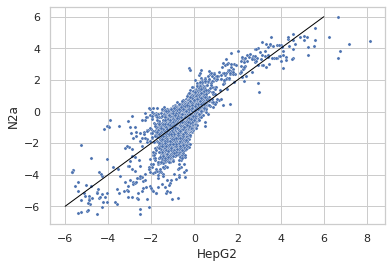

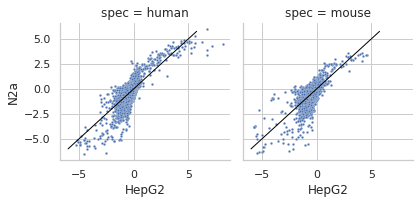

In [99]:
sns.set(style="whitegrid")
sns.scatterplot(data=both_merged_1M,
                x='HepG2',
                y='N2a',
               s=10)
plt.plot([-6,6],[-6,6],
        linewidth=1,
        color='black')

sns.set(style="whitegrid")
g = sns.FacetGrid(
    data=both_merged_1M,
    col='spec')
g.map(sns.scatterplot,
                'HepG2',
                'N2a',
               s=6)

def const_line(*args, **kwargs):
    x=np.arange(-6,6,.25)
    y=1*x
    plt.plot(y,x,
             linewidth=1,
        color='black')

g.map(const_line)
             
#g.map(plt.plot,[-6,6],[-6,6],
#        linewidth=1,
#        color='black')


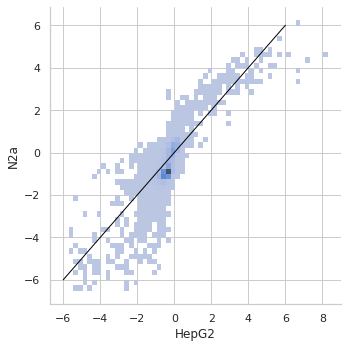

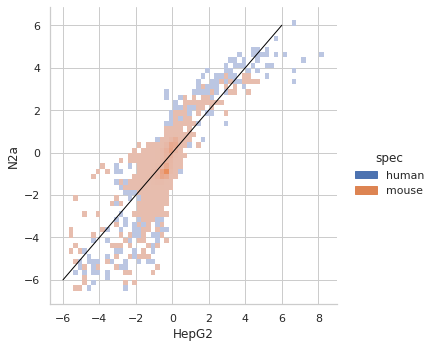

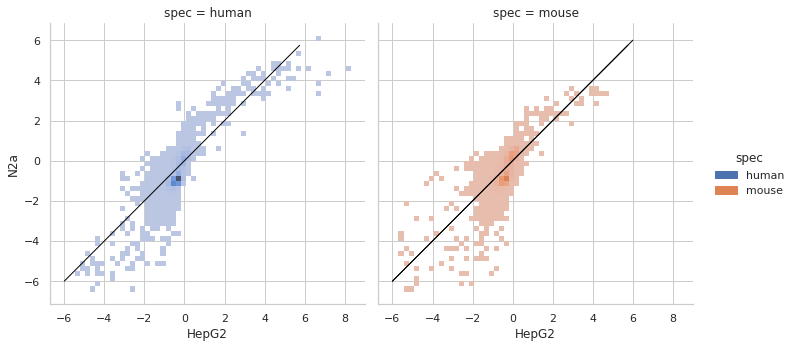

In [98]:
#sns.set(style='whitegrid')
#g = sns.FacetGrid(
#    data=both_merged_1M,
#    col='spec')
#g.map(sns.displot, 
#      'HepG2',
#      'N2a',
#      binwidth=(.25,.25))
#g.map(const_line)
sns.displot(data=both_merged_1M,
                x='HepG2',
                y='N2a',
           binwidth=(.25,.25))
plt.plot([-6,6],[-6,6],
        linewidth=1,
        color='black')

sns.displot(data=both_merged_1M,
                x='HepG2',
                y='N2a',
           hue="spec",
           binwidth=(.25,.25))
plt.plot([-6,6],[-6,6],
        linewidth=1,
        color='black')

sns.displot(data=both_merged_1M,
                x='HepG2',
                y='N2a',
           hue="spec",
           binwidth=(.25,.25),
           col='spec').map(const_line)
plt.plot([-6,6],[-6,6],
        linewidth=1,
        color='black')